In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVR  # Import SVR
from sklearn.model_selection import train_test_split

%matplotlib inline


In [10]:
# Load data
datafile = pd.read_csv("AMD (1980 -11.07.2023).csv")
datafile.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.0,2.916667,2.635417,2.666667,2.666667,436800


In [11]:
# Add Prev_close column to store previous close price
series_shifted = datafile['Close'].shift()
datafile['Prev_close'] = series_shifted

# Drop unused column for train data
datafile = datafile.drop(columns=['Adj Close'])

# Drop NaN values
datafile.dropna(inplace=True)


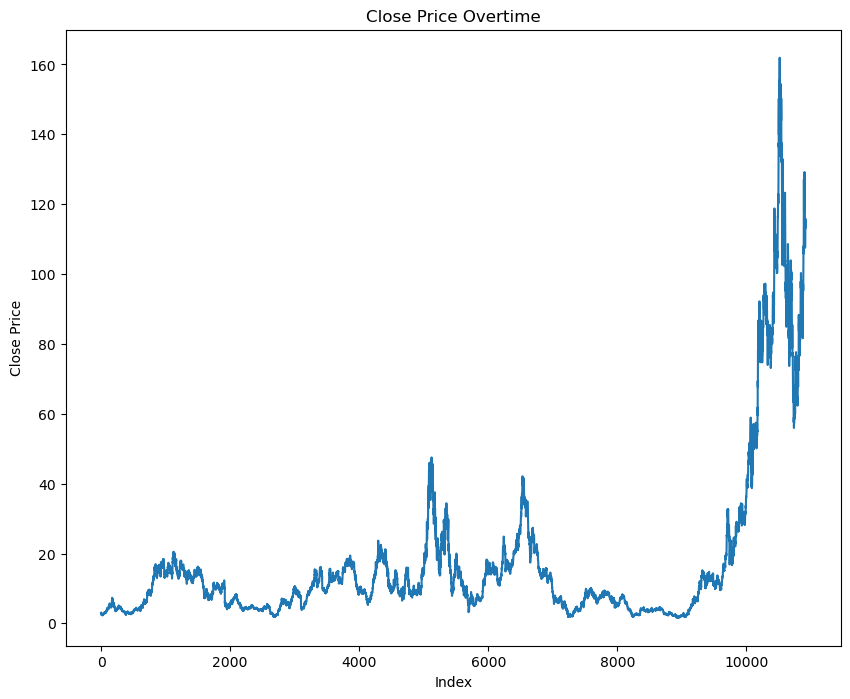

In [12]:
# Plot close price
datafile['Close'].plot(figsize=(10, 8))
plt.title("Close Price Overtime")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.show()


In [13]:
# Define target x and y
x = datafile[['Open', 'Prev_close', 'High', 'Low']]
y = datafile['Close']


In [14]:
# Allocate data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

print(x_train.shape, x_test.shape)


(8188, 4) (2730, 4)


In [15]:
# SVR model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)  # Kernel options: 'linear', 'poly', 'rbf', 'sigmoid'
svr_model.fit(x_train, y_train)

# Predicted value
predicted = svr_model.predict(x_test)
print("Predicted:", predicted)


Predicted: [15.2153917  15.04658384  8.31051286 ... 12.302623   17.64115497
  8.80383483]


In [16]:
# Comparison: predicted vs actual
_datafile = pd.DataFrame({"Actual": y_test, "Predicted": predicted})
print(_datafile)


          Actual  Predicted
1534   15.250000  15.215392
4440   15.312500  15.046584
7604    8.380000   8.310513
1313   14.375000  14.426520
5976   17.360001  16.952790
...          ...        ...
10212  76.660004  77.460738
7030    7.460000   7.267599
9568   12.420000  12.302623
3853   17.875000  17.641155
4783    8.812500   8.803835

[2730 rows x 2 columns]


In [17]:
# Evaluation metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Square Error: ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))


Mean Absolute Error:  0.1697377828546783
Mean Square Error:  0.17943616865840187
Root Mean Error:  0.423599065931928


In [18]:
# Predict on full data
predicted_full = svr_model.predict(x)


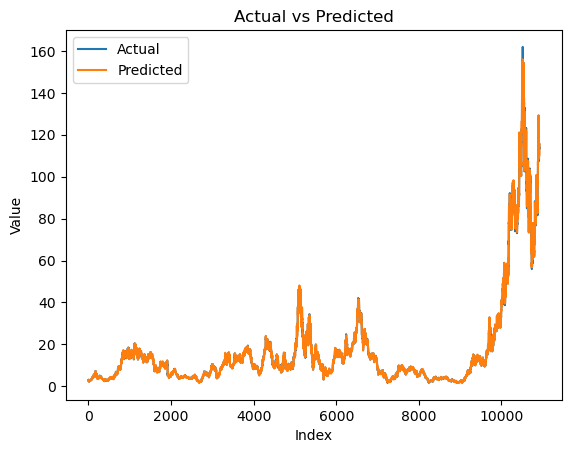

In [19]:
# Plot the graph
plt.plot(y.values, label="Actual")
plt.plot(predicted_full, label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()
